In [107]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [72]:
class Game:
    def __init__(self):
        self.stage = ['G','G','C']
        self.choice = None
        random.shuffle(self.stage)
        
    def set_choice(self,num):
        self.choice = num - 1

    
    def give_goat(self):
        if self.stage[self.choice] == 'C':
            goat_idx = list(set([0,1,2]) - set([self.choice]))
            return np.random.choice(goat_idx) + 1
        else:
            copy = self.stage.copy()
            copy[self.choice] = 'null'
            return copy.index('G') + 1
        
    def check_win(self):
        return True if self.stage[self.choice] == 'C' else False
        

### Run the cell below to PLAY

In [136]:
def play_monty_hall():
    game = Game()
    print('You have Three Choices...')
    print('1 2 or 3')
    choice = int(input('Enter your choice'))
    game.set_choice(choice)
    goat = game.give_goat()
    print('Now...curtain '+ str(goat)+ ' contains goat' )
    print('Would you like to switch.....yes or no..(in lowercase please)')
    switch = input()
    if switch == 'yes':
        choice = list(set([1,2,3]) - set([choice,goat]))[0]
        game.set_choice(choice)
    if game.check_win():
        print('Hurray........')
        print('Bloody hell...you won a car.....')
    else:
        print('bad luck...you get a goat')
    print('To play again, run this cell again please')    
    
    
play_monty_hall()    

You have Three Choices...
1 2 or 3
Enter your choice2
Now...curtain 1 contains goat
Would you like to switch.....yes or no..(in lowercase please)
So.......yes or noyes
Hurray........
Bloody hell...you won a car.....
To play again, run this cell again please


# Now lets see which of the two choices have a better chance of winning....Switching or sticking to the same...

In [104]:
def monty_hall_stimulation(total_games,switch = True):
    wins = 0
    for itr in range(total_games):
        game = Game()
        choice = np.random.choice([1,2,3])
        game.set_choice(choice)
        goat = game.give_goat()
        switch_choice = list(set([1,2,3]) - set([choice,goat]))[0]
        if switch:
            game.set_choice(switch_choice)
        if game.check_win():
            wins+=1
            
    return (wins / total_games)   

In [103]:
total_games = 10**np.arange(1,7)
total_games

array([     10,     100,    1000,   10000,  100000, 1000000])

# Choice 1: always switch

In [105]:
always_switch_scores = {}
for curr_itr in total_games:
    always_switch_scores[curr_itr] = monty_hall_stimulation(curr_itr,switch = True)

Text(0, 0.5, 'Probability of Winning')

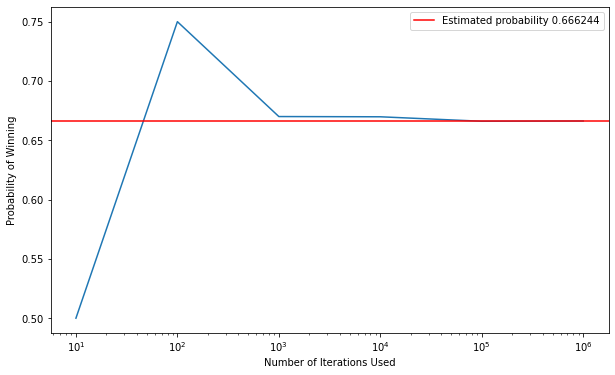

In [125]:
plt.figure(figsize = (10,6))
plt.plot(list(always_switch_scores.keys()),list(always_switch_scores.values()))
est_prob_switch = list(always_switch_scores.values())[-1]
plt.axhline(y = est_prob_switch ,c = 'red',label = 'Estimated probability ' + str(est_prob_switch))
plt.xscale('log')
plt.legend()
plt.xlabel('Number of Iterations Used')
plt.ylabel('Probability of Winning')

So, the probability of winning would be 66%...now lets see the case where i don't switch..

# Choice 2 Stick to the first guess

In [114]:
do_not_switch_scores = {}
for curr_itr in total_games:
    do_not_switch_scores[curr_itr] = monty_hall_stimulation(curr_itr,switch = False)

Text(0, 0.5, 'Probability of Winning')

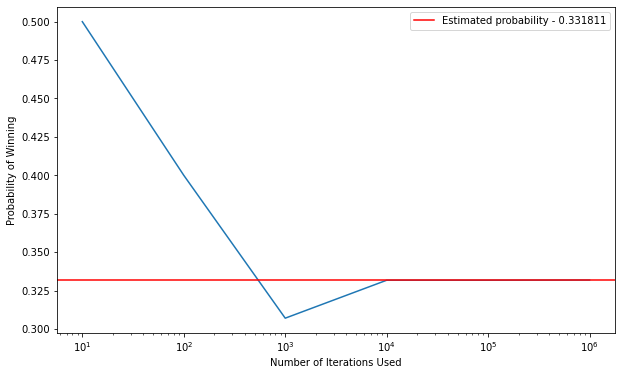

In [123]:
plt.figure(figsize = (10,6))
plt.plot(list(do_not_switch_scores.keys()),list(do_not_switch_scores.values()))
est_prob_do_not_switch = list(do_not_switch_scores.values())[-1]
plt.axhline(y = est_prob_do_not_switch ,c = 'red',label = 'Estimated probability - '+ str(est_prob_do_not_switch))
plt.xscale('log')
plt.legend()
plt.xlabel('Number of Iterations Used')
plt.ylabel('Probability of Winning')

# so, we have the answer....

# Final Conclusion

Text(0, 0.5, 'Winning percentage')

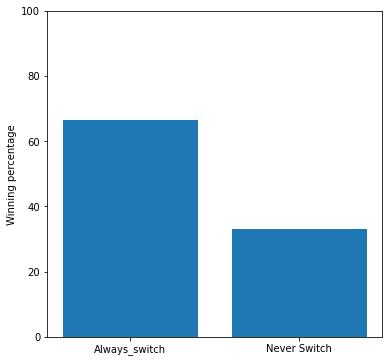

In [133]:
plt.figure(figsize = (6,6))
plt.bar(['Always_switch','Never Switch'], [est_prob_switch*100,est_prob_do_not_switch*100])
plt.ylim(0,100)
plt.ylabel('Winning percentage')

## Always switching will have around 66% chance of winning as compared to the 33% when one never switches